## EDA

#### Contexto

Has iniciado tu labor en el equipo de Datos y Analítica de una empresa financiera, desempeñándote como Científico de Datos Junior Advanced. Tu primera asignación consiste en desarrollar un modelo predictivo mediante técnicas de aprendizaje automático, utilizando información histórica de créditos, con el objetivo de anticipar el comportamiento de nuevos usuarios.

La empresa opera bajo un esquema estructurado de proyectos, en el cual cada iniciativa debe seguir una arquitectura de carpetas estrictamente definida. Esta estructura no puede ser modificada, ya que los procesos de despliegue a producción están automatizados a través de pipelines de validación en Jenkins. Cualquier alteración en la organización de carpetas podría generar retrasos significativos en el paso a producción.

#### Descripción de columnas:

- **tipo_credito**	Tipo de crédito otorgado al cliente (por ejemplo: personal, consumo, hipotecario, etc.).
- **fecha_prestamo**	Fecha en la que se otorgó el préstamo.
- **capital_prestado**	Monto de capital inicial otorgado al cliente en el préstamo.
- **plazo_meses**	Cantidad de meses pactados para la devolución total del préstamo.
- **edad_cliente**	Edad del cliente al momento de otorgarse el crédito.
- **tipo_laboral**	Tipo de situación laboral del cliente (dependiente, independiente, informal, etc.).
- **salario_cliente**	Ingreso mensual declarado del cliente.
- **total_otros_prestamos**	Monto total correspondiente a otros préstamos vigentes del cliente.
- **cuota_pactada**	Valor de la cuota mensual acordada para el préstamo actual.
- **puntaje**	Puntaje interno asignado al cliente según criterios de la entidad. (0-100)
- **puntaje_datacredito**	Puntaje crediticio proveniente de la central de riesgo (Datacrédito).
- **cant_creditosvigentes**	Cantidad de créditos activos que posee el cliente al momento del análisis.
- **huella_consulta**	Indicador de consultas recientes al historial crediticio del cliente.
- **saldo_mora**	Monto total que el cliente presenta en mora.
- **saldo_total**	Saldo total adeudado por el cliente considerando capital y mora.
- **saldo_principal**	Saldo pendiente correspondiente únicamente al capital del préstamo.
- **saldo_mora_codeudor**	Saldo en mora asociado a créditos donde el cliente figura como codeudor.
- **creditos_sectorFinanciero**	Cantidad o monto de créditos activos en el sector financiero.
- **creditos_sectorCooperativo**	Cantidad o monto de créditos activos en el sector cooperativo.
- **creditos_sectorReal**	Cantidad o monto de créditos activos en el sector real (comercial/industrial).
- **promedio_ingresos_datacredito**	Promedio histórico de ingresos reportados en Datacrédito.
- **tendencia_ingresos**	Tendencia del ingreso del cliente en el tiempo (creciente, estable o decreciente).
- **Pago_atiempo**	Variable objetivo: indica si el cliente realizó el pago en tiempo y forma (1 = sí, 0 = no).

## 1 - Exploración inicial de datos

#### Librerias

In [96]:
# importacion de librerias
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as norm
from cargar_datos import cargar_datos
from datetime import datetime


# 2 - Carga y Descripción Inicial de los Datos 

#### Cargo dataset

In [97]:
df = cargar_datos()
df.head()

,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [98]:
df.shape

(10763, 23)

#### Tipos de datos

In [99]:
df.head().T

,0,1,2,3,4
tipo_credito,7,4,9,4,9
fecha_prestamo,2024-12-21 11:31:35,2025-04-22 09:47:35,2026-01-08 12:22:40,2025-08-04 12:04:10,2025-04-26 11:24:26
capital_prestado,3692160.0,840000.0,5974028.4,1671240.0,2781636.0
plazo_meses,10,6,10,6,11
edad_cliente,42,60,36,48,44
tipo_laboral,Independiente,Empleado,Independiente,Empleado,Empleado
salario_cliente,8000000,3000000,4036000,1524547,5000000
total_otros_prestamos,2500000,2000000,829000,498000,4000000
cuota_pactada,341296,124876,529554,252420,217037
puntaje,88.768094,95.227787,47.613894,95.227787,95.227787


In [100]:
#Muestro informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

Se visualiza a primera vista que los tipos de valores son correctos

#### Valores faltantes

In [101]:
df.isnull().sum()
(df.isnull().mean() * 100).sort_values(ascending=False)

tendencia_ingresos               27.241475
promedio_ingresos_datacredito    27.222893
saldo_mora_codeudor               5.481743
saldo_principal                   3.762891
saldo_mora                        1.449410
saldo_total                       1.449410
puntaje_datacredito               0.055747
salario_cliente                   0.000000
tipo_laboral                      0.000000
edad_cliente                      0.000000
plazo_meses                       0.000000
capital_prestado                  0.000000
fecha_prestamo                    0.000000
tipo_credito                      0.000000
total_otros_prestamos             0.000000
cant_creditosvigentes             0.000000
huella_consulta                   0.000000
cuota_pactada                     0.000000
puntaje                           0.000000
creditos_sectorCooperativo        0.000000
creditos_sectorFinanciero         0.000000
creditos_sectorReal               0.000000
Pago_atiempo                      0.000000
dtype: floa

Se visualizan algunos valores faltantes para las siguientes columnas que deberian tratarse:

- tendencia_ingresos               27.241475
- promedio_ingresos_datacredito    27.222893
- saldo_mora_codeudor               5.481743
- saldo_principal                   3.762891
- saldo_mora                        1.449410
- saldo_total                       1.449410
- puntaje_datacredito               0.055747

#### Duplicados

In [102]:
df.duplicated().sum()

np.int64(0)

No se encontraron valores duplicados

#### Tratamiento de valores nulos 
- tendencia_ingresos               27.241475 -> insertamos valor "Sin_informacion", El nulo es información
- promedio_ingresos_datacredito    27.222893 -> insertamos valor "mediana" para no tener en cuenta outliers
- saldo_mora_codeudor               5.481743 -> insertamos valor 0 (Si el saldo no existe, se asume cero)
- saldo_principal                   3.762891 -> insertamos valor 0 (Si el saldo no existe, se asume cero)
- saldo_mora                        1.449410 -> insertamos valor 0 (Si el saldo no existe, se asume cero)
- saldo_total                       1.449410 -> insertamos valor 0 (Si el saldo no existe, se asume cero)
- puntaje_datacredito               0.055747 -> insertamos valor "mediana" para no tener en cuenta outliers

In [103]:
#tendencia_ingresos nulos, int o float -> "Sin_informacion"
df['tendencia_ingresos'] = df['tendencia_ingresos'].apply(
    lambda x: 'Sin_informacion' if isinstance(x, (int, float)) or pd.isna(x) else x
)

#promedio_ingresos_datacredito nulos -> valor mediana
mediana_promedio_ingresos_datacredito = df['promedio_ingresos_datacredito'].median()
df['promedio_ingresos_datacredito'] = df['promedio_ingresos_datacredito'].fillna(mediana_promedio_ingresos_datacredito)

#saldo_mora_codeudor  nulos -> valor 0
df['saldo_mora_codeudor'] = df['saldo_mora_codeudor'].fillna(0)

#saldo_principal  nulos -> valor 0
df['saldo_principal'] = df['saldo_principal'].fillna(0)

#saldo_mora  nulos -> valor 0
df['saldo_mora'] = df['saldo_mora'].fillna(0)

#saldo_total  nulos -> valor 0
df['saldo_total'] = df['saldo_total'].fillna(0)

#puntaje_datacredito  nulos -> valor mediana
df['puntaje_datacredito'] = df['puntaje_datacredito'].fillna(df['puntaje_datacredito'].median())


## 3- Exploración de datos y descripción (EDA)

### 3.1- Análisis univariable

#### Variables numéricas

In [104]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
tipo_credito,10763.0,5.411131,4.0,4.0,4.0,9.0,68.0,2.338279
fecha_prestamo,10763,2025-04-16 23:06:02.111121664,2024-11-26 09:17:04,2025-01-20 17:33:07.500000,2025-03-27 16:23:12,2025-06-16 13:27:58,2026-04-26 18:43:52,NaN
capital_prestado,10763.0,2434315.001319,360000.0,1224831.0,1921920.0,3084840.0,41444152.8,1909642.758997
plazo_meses,10763.0,10.575583,2.0,6.0,10.0,12.0,90.0,6.632082
edad_cliente,10763.0,43.94862,19.0,33.0,42.0,53.0,123.0,15.060877
salario_cliente,10763.0,17216431.459909,0.0,2000000.0,3000000.0,4875808.0,22000000000.0,355476717.603482
total_otros_prestamos,10763.0,6238869.648518,0.0,500000.0,1000000.0,2000000.0,6787675263.0,118418316.941069
cuota_pactada,10763.0,243617.406671,23944.0,121041.5,182863.0,287833.5,3816752.0,210493.694608
puntaje,10763.0,91.170036,-38.00999,95.227787,95.227787,95.227787,95.227787,16.465441
puntaje_datacredito,10763.0,780.796525,-7.0,757.0,791.0,825.0,999.0,104.849068


Podemos mencionar algunos aspectos que sobresalen:
1. edad: el valor min expresa valor 19 y valor max 123. Merece algun tratamiento (validar con boxplots)
2. plazo_meses: el valor maximo es de 90 meses. (validar con boxplots si hay outliers)
3. salario_cliente: el valor minimo es 0 y el maximo es 22000000000.0. (validar con boxplots si hay outliers)
4. total_otros_prestamos: tiene un valor minimo es 0 y el maximo es 6787675263.0. (validar con boxplots si hay outliers)
5. puntaje: contiene minimo negativo, merece tratamiento
6. puntaje_datacredito: contiene minimo negativo, merece tratamiento
7. fecha_prestamo: contiene fechas superiores a la actual, se eliminan aquellas ya que deben ser prestamos historicos.

Detectamos variables categóricas:
- *tipo_credito* es una variable categorica que esta escrita con codigo numerica son identificadores.
- *Pago_atiempo* es una variable target pero es booleana, se podria considerar categorica.

In [105]:
#Quitamos las variables numericas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
remove_tipo_credito = 'tipo_credito'
remove_Pago_atiempo = 'Pago_atiempo'
num_cols.remove(remove_tipo_credito)
num_cols.remove(remove_Pago_atiempo)

#eliminamos fechas mayores a la actual ya que son prestamos historicos
df["fecha_prestamo"] = pd.to_datetime(df["fecha_prestamo"], errors="coerce")

#Obtengo fecha actual
hoy = pd.Timestamp.today().normalize()

#eliminamos fechas mayores a la actual
df = df[df["fecha_prestamo"] <= hoy]

df["fecha_prestamo"].describe().T


count                            10659
mean     2025-04-13 19:25:10.087907072
min                2024-11-26 09:17:04
25%                2025-01-20 12:54:37
50%                2025-03-26 11:33:38
75%         2025-06-13 15:26:04.500000
max                2026-02-08 17:13:56
Name: fecha_prestamo, dtype: object

#### Generamos boxplots (outliers)

Deteccion de outliers de las variables:

- edad_cliente
- plazo_meses
- salario_cliente
- total_otros_prestamos
- puntaje
- puntaje_datacredito

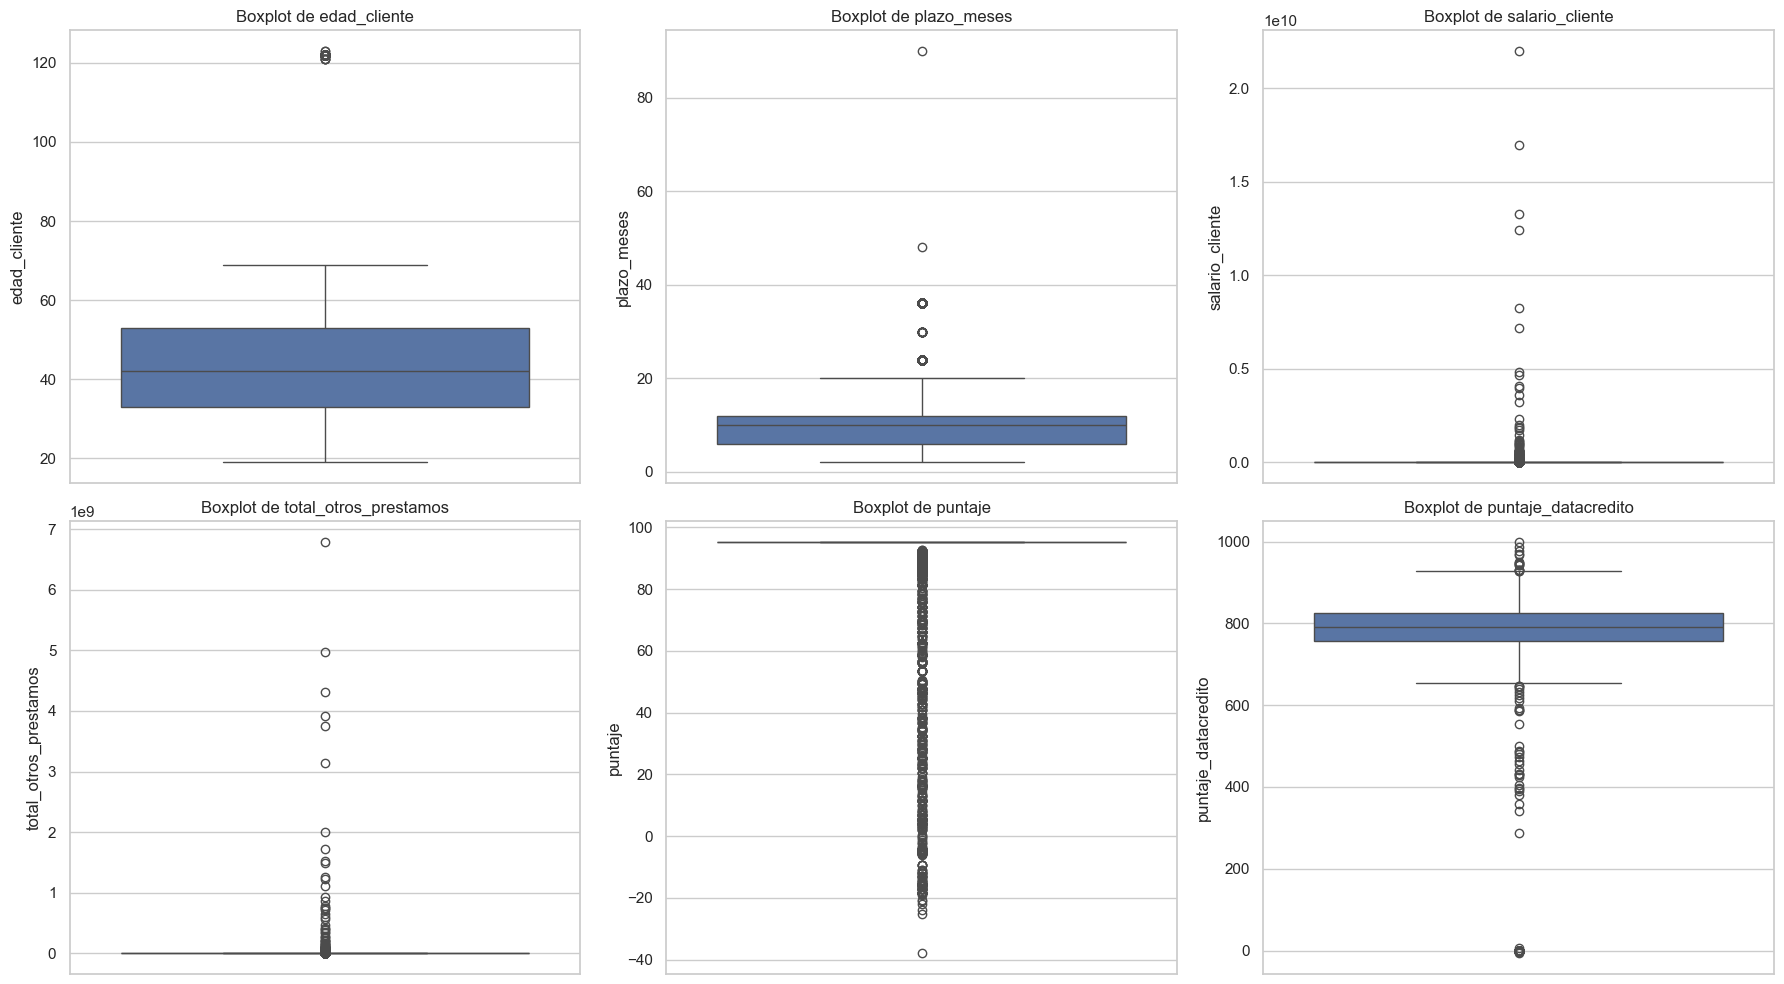

In [106]:
box_cols = [
    "edad_cliente",
    "plazo_meses",
    "salario_cliente",
    "total_otros_prestamos",
    "puntaje",
    "puntaje_datacredito"
]

plt.figure(figsize=(18, 10))

for i, col in enumerate(box_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


- Se visualizan *edades* de > 100 irreales
- Se visualizan *plazo_meses* > 60 meses. Se consideran extraños para creditos personales
- Se visualizan *salarios* absurdos
- Se visualizan *total_otros_prestamos* tan altos no son realistas para personas físicas
- Se visualizan puntajes negativos, pero como no se sabe si deberian ser positivos, se decide dejarlos
- Se visualizan puntajes_datacredito con outliers < 300 y algunos > 950 aproximadamente pero se decide dejarlos.

#### Tratamiento de outliers

In [107]:
#Eliminamos outliers de clientes con edades > 90 años
df = df[df["edad_cliente"] <= 90]

#Eliminamos outliers de clientes con Plazos > 60 meses
df = df[df["plazo_meses"] <= 60]

#Eliminamos outliers de clientes con salarios > al percentil 99 
p99 = df["salario_cliente"].quantile(0.99)
df = df[df["salario_cliente"] <= p99]

#Eliminamos outliers de clientes con prestamos > al percentil 99 
p99 = df["total_otros_prestamos"].quantile(0.99)
df = df[df["total_otros_prestamos"] <= p99]



#### Generamos histogramas

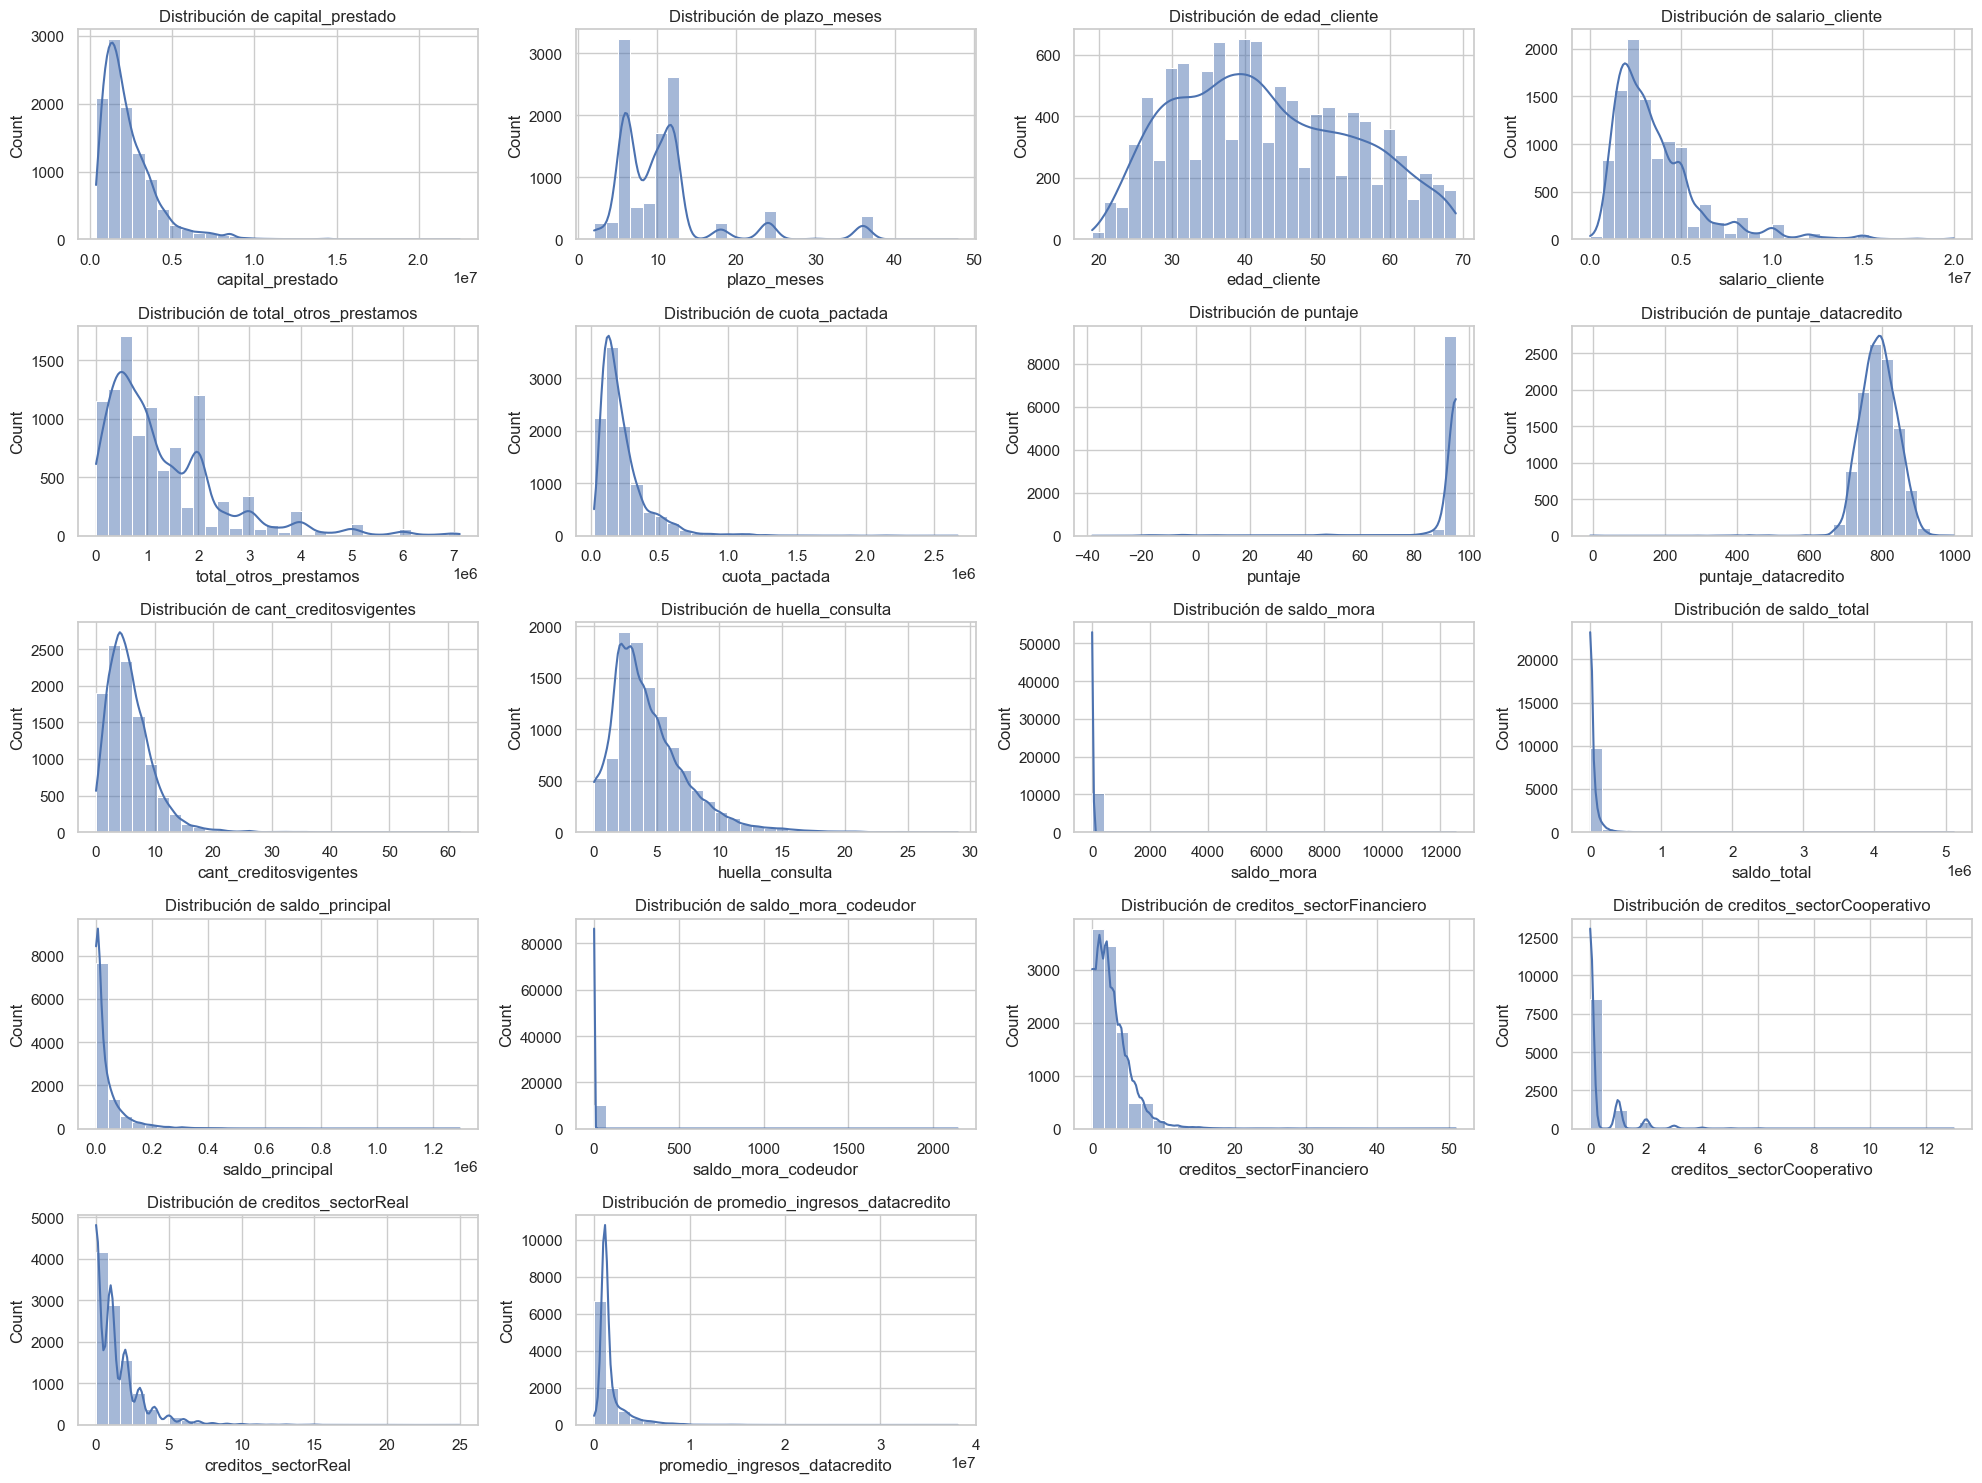

In [108]:
plt.figure(figsize=(20, 15))

for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()


Conclusiones:

1. **Variables monetarias**: presentan fuerte asimetría positiva (cola larga a la derecha). La mayoría de los valores se concentran en rangos bajos como *capital_prestado* o *salario_cliente*. Se toma la decision de dejar esos outliers.

2. **Variables temporales y de conteo**: Distribuciones discretas, con picos claros en valores bajos. La mayoría de los clientes tienen pocos créditos activos y presentan pocas consultas recientes

3. **Variables demográficas (edad_cliente):** Distribución relativamente simétrica y concentración entre 30 y 55 años

4. **Variables de puntaje (puntaje, puntaje_datacredito):** *Puntaje* tiene una acumulación fuerte en valores altos (80–100), presencia de valores negativos. *puntaje_datacredito* tiene una distribución aproximadamente normal y un centro alrededor de 750–800

### 3.2- Análisis bivariable

#### Colores

In [109]:
color_map = {
    1: "green",  # Paga a tiempo
    0: "red"     # No paga a tiempo
}

#### Variable numérica vs target

Se realizaron comparaciones como: 
- salario_cliente vs Pago_atiempo
- puntaje vs Pago_atiempo
- cuota_pactada vs Pago_atiempo

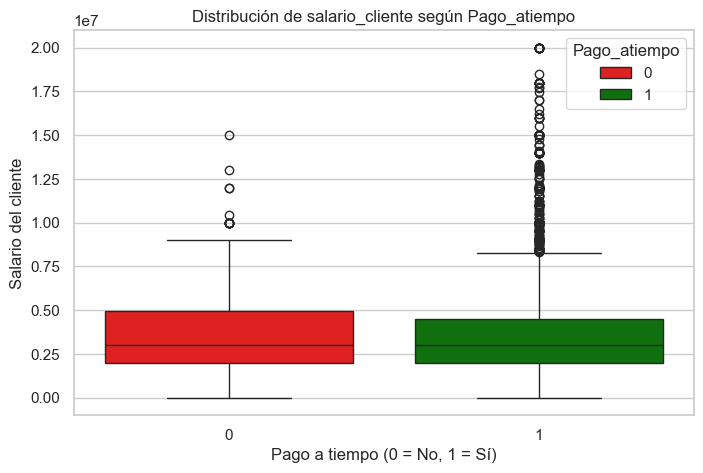

In [110]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="Pago_atiempo",
    y="salario_cliente",
    hue="Pago_atiempo",
    palette=color_map,
    dodge=False
)


plt.title("Distribución de salario_cliente según Pago_atiempo")
plt.xlabel("Pago a tiempo (0 = No, 1 = Sí)")
plt.ylabel("Salario del cliente")
plt.show()

El salario_cliente muestra una relación positiva moderada con el pago a tiempo, aunque con una superposición significativa entre grupos. Esto indica que mayores ingresos pueden favorecer el cumplimiento, pero no son suficientes por sí solos para explicar el comportamiento de pago.

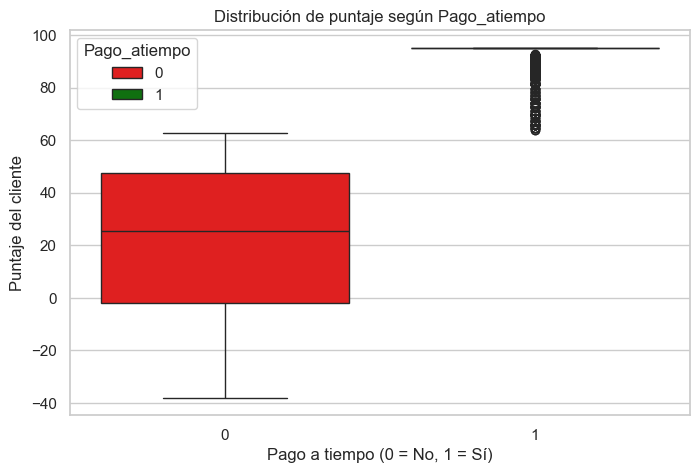

In [111]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="Pago_atiempo",
    y="puntaje",
    hue="Pago_atiempo",
    palette=color_map,
    dodge=False
)

plt.title("Distribución de puntaje según Pago_atiempo")
plt.xlabel("Pago a tiempo (0 = No, 1 = Sí)")
plt.ylabel("Puntaje del cliente")
plt.show()


El puntaje presenta un alto poder discriminante, diferenciando claramente a los clientes según su comportamiento de pago. Los clientes con puntajes elevados muestran una fuerte asociación con el pago en tiempo y forma.

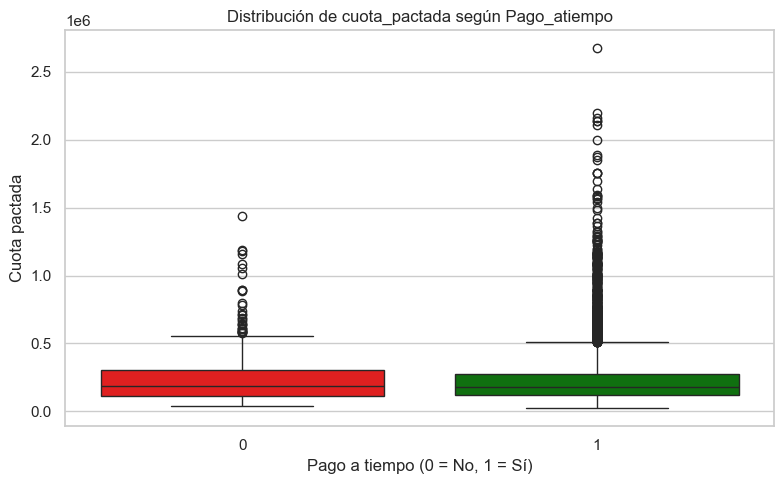

In [112]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="Pago_atiempo",
    y="cuota_pactada",
    hue="Pago_atiempo",
    palette=color_map,
    dodge=False
)

plt.title("Distribución de cuota_pactada según Pago_atiempo")
plt.xlabel("Pago a tiempo (0 = No, 1 = Sí)")
plt.ylabel("Cuota pactada")
plt.legend().remove()  
plt.tight_layout()
plt.show()


La variable cuota_pactada por sí sola no discrimina claramente entre clientes que pagan y no pagan a tiempo, ya que las distribuciones centrales son similares. Sin embargo, la presencia de cuotas elevadas en clientes cumplidores sugiere que el monto de la cuota no es necesariamente un factor de riesgo aislado ya que son los que pagan a tiempo.

#### Variable categórica vs target

Se realizaron comparaciones como: 
- tipo_laboral vs Pago_atiempo
- tipo_credito vs Pago_atiempo
- tendencia_ingresos vs Pago_atiempo

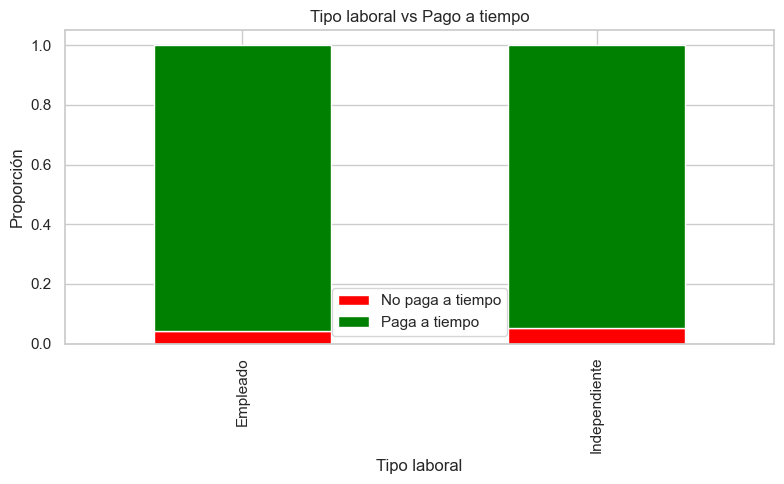

In [113]:
tabla_tipo_laboral = pd.crosstab(
    df["tipo_laboral"],
    df["Pago_atiempo"],
    normalize="index"
)

tabla_tipo_laboral.plot(
    kind="bar",
    stacked=True,
    color=[color_map[0], color_map[1]],
    figsize=(8,5)
)

plt.title("Tipo laboral vs Pago a tiempo")
plt.ylabel("Proporción")
plt.xlabel("Tipo laboral")
plt.legend(["No paga a tiempo", "Paga a tiempo"])
plt.tight_layout()
plt.show()

El tipo laboral no parece ser una variable altamente discriminante del comportamiento de pago, ya que tanto empleados como independientes muestran tasas de cumplimiento muy similares.

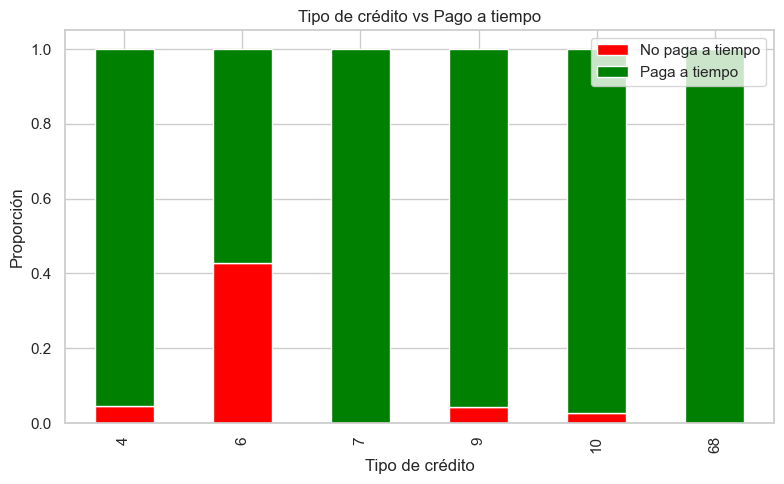

In [114]:
tabla_tipo_credito = pd.crosstab(
    df["tipo_credito"],
    df["Pago_atiempo"],
    normalize="index"
)

tabla_tipo_credito.plot(
    kind="bar",
    stacked=True,
    color=[color_map[0], color_map[1]],
    figsize=(8,5)
)

plt.title("Tipo de crédito vs Pago a tiempo")
plt.ylabel("Proporción")
plt.xlabel("Tipo de crédito")
plt.legend(["No paga a tiempo", "Paga a tiempo"])
plt.tight_layout()
plt.show()


El tipo de crédito muestra diferencias relevantes en el comportamiento de pago. En particular, el crédito de tipo 6 presenta un riesgo considerablemente mayor de incumplimiento respecto al resto.

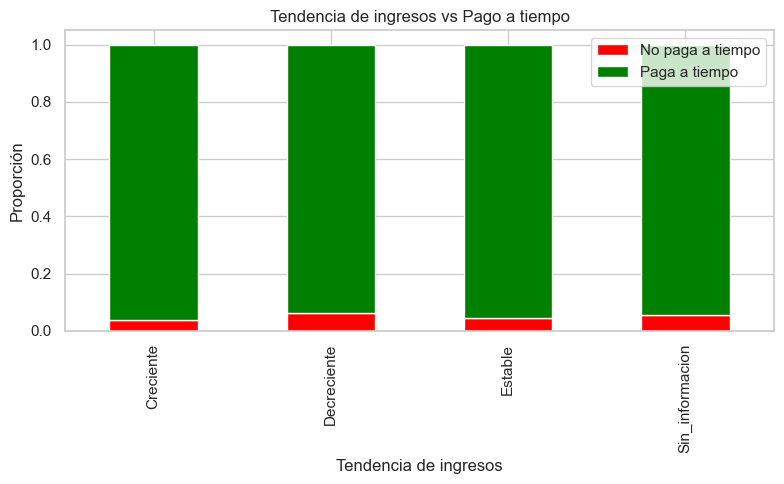

In [115]:
tabla_tendencia = pd.crosstab(
    df["tendencia_ingresos"],
    df["Pago_atiempo"],
    normalize="index"
)

tabla_tendencia.plot(
    kind="bar",
    stacked=True,
    color=[color_map[0], color_map[1]],
    figsize=(8,5)
)

plt.title("Tendencia de ingresos vs Pago a tiempo")
plt.ylabel("Proporción")
plt.xlabel("Tendencia de ingresos")
plt.legend(["No paga a tiempo", "Paga a tiempo"])
plt.tight_layout()
plt.show()


La tendencia de ingresos no evidencia una capacidad discriminante fuerte respecto al comportamiento de pago, ya que en todas las categorías se observa una alta proporción de cumplimiento.

#### Numérica vs numérica

Se realizaran comparaciones como: 
- salario_cliente vs cuota_pactada
- capital_prestado vs saldo_total
- edad_cliente vs puntaje

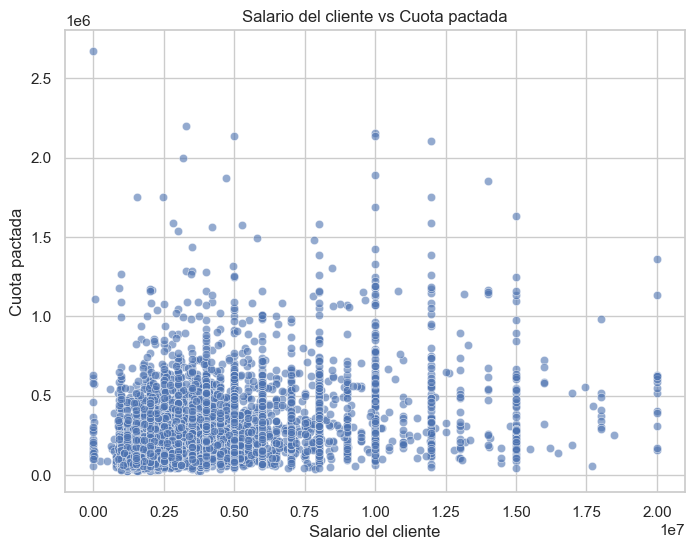

In [116]:
#salario_cliente vs cuota_pactada

sns.set(style="whitegrid")

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='salario_cliente',
    y='cuota_pactada',
    alpha=0.6
)
plt.title('Salario del cliente vs Cuota pactada')
plt.xlabel('Salario del cliente')
plt.ylabel('Cuota pactada')
plt.show()



La cuota pactada no depende exclusivamente del salario del cliente. La relación es débil y altamente dispersa, lo que sugiere que intervienen otros factores (puntaje, historial crediticio, tipo de crédito). La variable salario por sí sola no resulta suficiente para explicar la cuota asignada.

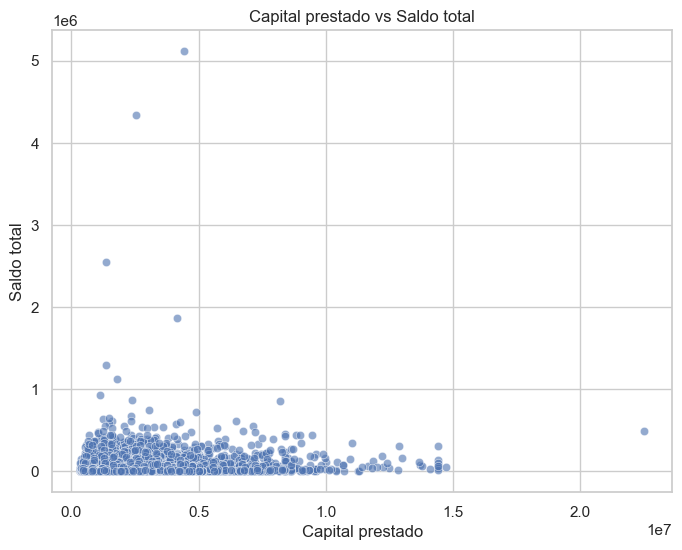

In [117]:
#capital_prestado vs saldo_total 

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='capital_prestado',
    y='saldo_total',
    alpha=0.6
)
plt.title('Capital prestado vs Saldo total')
plt.xlabel('Capital prestado')
plt.ylabel('Saldo total')
plt.show()


No se ve que a mayor saldo total vaya a tener un capital prestado mayor. Se puede apenas visualizar que a mayor capital prestado tiende a tener un menor saldo total el cliente

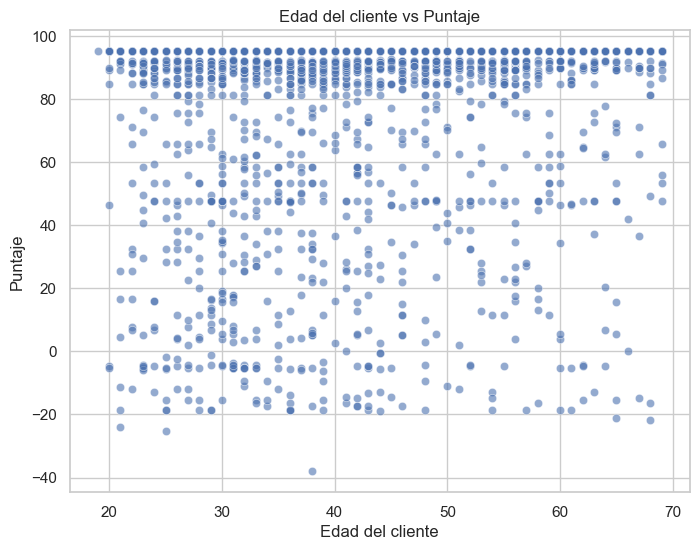

In [118]:
# edad_cliente vs puntaje

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='edad_cliente',
    y='puntaje',
    alpha=0.6
)
plt.title('Edad del cliente vs Puntaje')
plt.xlabel('Edad del cliente')
plt.ylabel('Puntaje')
plt.show()


La edad del cliente claramente no muestra una relación directa con el puntaje crediticio. El puntaje parece depender principalmente del comportamiento financiero y crediticio del cliente, más que de factores demográficos como la edad.

### 3.3- Análisis multivariable

#### Matriz de correlación

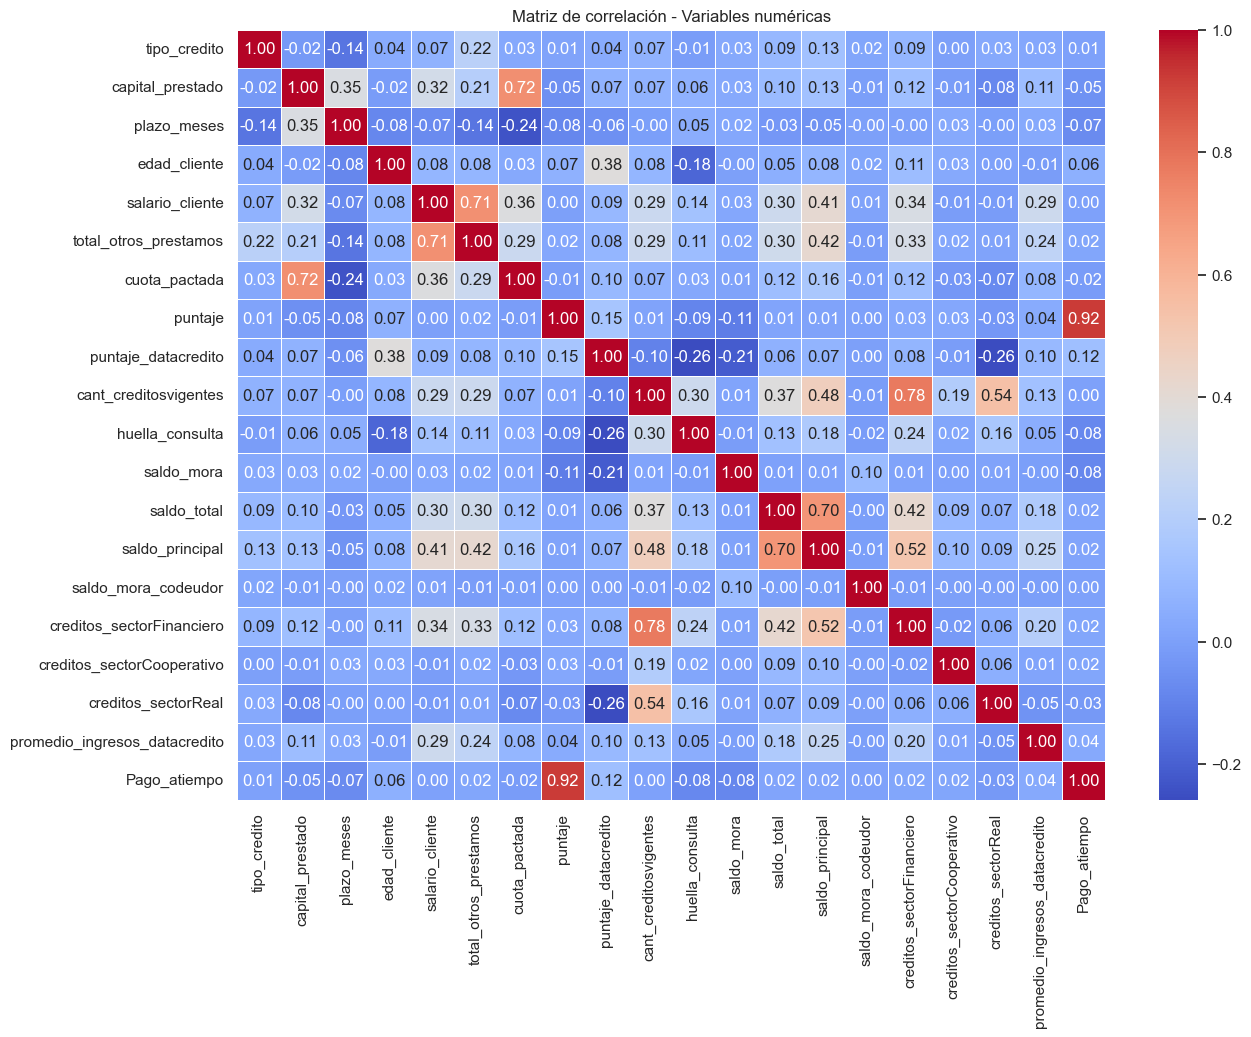

In [119]:
# Seleccionar solo variables numéricas
df_num = df.select_dtypes(include='number')

# Matriz de correlación
corr = df_num.corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Matriz de correlación - Variables numéricas")
plt.show()

1) Se observan correlaciones altas entre:

- puntaje ↔ Pago_atiempo (≈ 0.92)
- cant_creditosvigentes ↔ creditos_sectorFinanciero (≈ 0.78)
- capital_prestado ↔ cuota_pactada (≈ 0.72)
- total_otros_prestamos ↔ saldo_cliente (≈ 0.71)
- saldo_total ↔ saldo_cliente (≈ 0.70)

El *puntaje crediticio* es la variable con mayor poder explicativo directo del comportamiento de pago. Esto indica: fuerte capacidad predictiva, posible riesgo de data leakage si el puntaje fue calculado usando información posterior al evento. Este punto es crítico y debe evaluarse antes de modelar.

2) *puntaje_datacredito* muestra:

- correlaciones negativas con huella_consulta (≈ -0.26)
- correlaciones negativas con saldo_mora (≈ -0.21)

Un mayor puntaje en *Datacrédito* se asocia a: menor nivel de mora, menor cantidad de consultas recientes, lo que refuerza su valor como indicador de riesgo crediticio.

3) La variable *cant_creditosvigentes* presenta correlaciones relevantes con:

- creditos_sectorFinanciero (≈ 0.78)
- creditos_sectorReal (≈ 0.54)
- saldo_principal (≈ 0.48)

La cantidad de créditos activos refleja el nivel de exposición financiera del cliente y se relaciona directamente con el monto de deuda acumulada.

4) Algunas Variables presentan correlaciones bajas o nulas con Pago_atiempo como:

- edad_cliente
- tipo_credito
- plazo_meses
- saldo_mora_codeudor

Estas variables podrían: tener impacto solo en combinación con otras, o ser más útiles en modelos no lineales (árboles, boosting) pero no muestran poder discriminante individual fuerte.

#### Análisis combinado con target
Caso 1: salario_cliente + cuota_pactada + Pago_atiempo

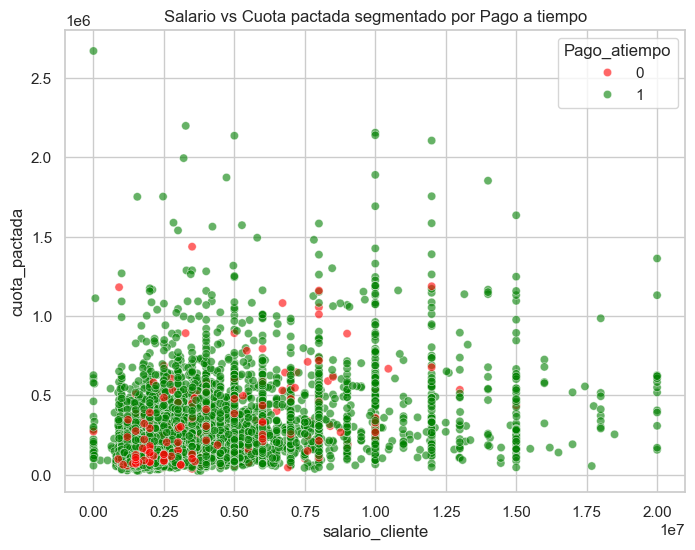

In [120]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="salario_cliente",
    y="cuota_pactada",
    hue="Pago_atiempo",
    alpha=0.6,
    palette=color_map
)
plt.title("Salario vs Cuota pactada segmentado por Pago a tiempo")
plt.show()


Se observa que la mayoria de los clientes tienen un sueldo entre 0 y 0.8e7 y su cuota pactada está entre 0 y 0,75e6. Además, existe un alto solapamiento entre clientes que pagan y no pagan a tiempo. El salario por sí solo no es suficiente para discriminar el comportamiento de pago, debe analizarse en conjunto con otras variables financieras.

Caso 2: puntaje + saldo_mora + Pago_atiempo

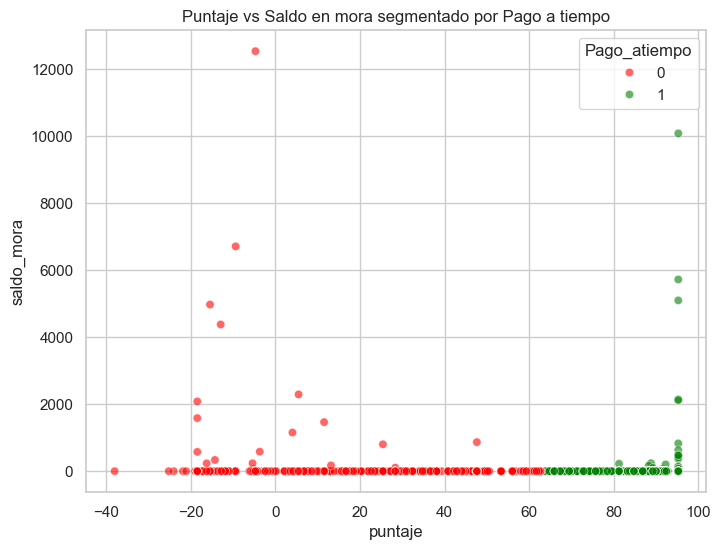

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="puntaje",
    y="saldo_mora",
    hue="Pago_atiempo",
    alpha=0.6,
    palette=color_map
)
plt.title("Puntaje vs Saldo en mora segmentado por Pago a tiempo")
plt.show()


Los clientes con puntajes altos se concentran mayormente en el grupo que paga a tiempo (verde), mientras que los puntajes bajos o negativos se asocian con mayor incumplimiento.

#### Segmentaciones

In [122]:
segmentacion = (
    df.groupby(["tipo_credito", "Pago_atiempo"])
      .size()
      .unstack(fill_value=0)
)

segmentacion


Pago_atiempo,0,1
tipo_credito,,
4,352,7204
6,9,12
7,0,1
9,116,2510
10,3,110
68,0,1


In [123]:
segmentacion = (
    df.groupby(["tipo_credito", "Pago_atiempo"])
      .size()
      .unstack(fill_value=0)
)

porcentaje_no_pago = segmentacion.div(segmentacion.sum(axis=1), axis=0) * 100

porcentaje_no_pago[0].sort_values(ascending=False)

tipo_credito
6     42.857143
4      4.658549
9      4.417365
10     2.654867
7      0.000000
68     0.000000
Name: 0, dtype: float64

Se puede observar que aunque sean muy pocos los aquellos clientes con tipo_credito 6 tienen un 42.85% de pagos fuera de tiempo. Debemos tener en cuenta que la mayoria de los clientes tiene el tipo_credito 4 que tiene un 4.64% de pagos fuera de tiempo representando a 354 clientes. Tambien se encuntran aquellos con tipo_credito 9 con el 4.54% de pagos fuera de tiempo representando 121 clientes.

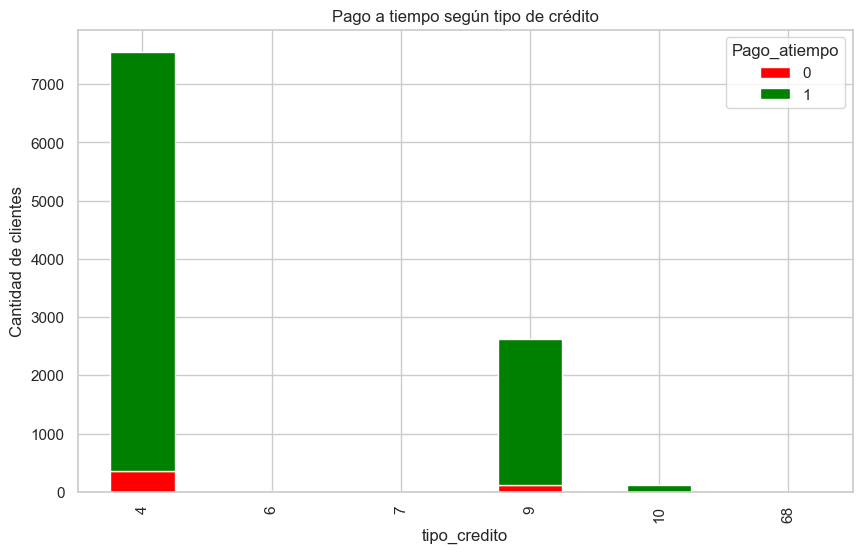

In [124]:
segmentacion.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=color_map
)
plt.title("Pago a tiempo según tipo de crédito")
plt.ylabel("Cantidad de clientes")
plt.show()


Se observa que la gran mayoría de los clientes se concentra en los tipos de crédito 4 y 9, mientras que los tipos 6, 7, 10 y 68 presentan volúmenes muy bajos. El análisis del comportamiento de pago está dominado por estos tipos de crédito, por lo que los resultados globales del modelo estarán fuertemente influenciados por ellos.